In [3]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 


# Read in the data

df = pd.read_csv(r'C:\Users\joebe\Desktop\movie dataset\movies.csv')

In [4]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# Do we have any missing data?

for col in df.columns:
    missing_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_pct))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
# Let's check our data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Changing budget, gross, and votes to integer data types
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)

In [7]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [13]:
# Extracting the year from the released column
df['released'] = df['released'].astype(str)

def correct_year(date_string):
    match = re.search(r'(\d{4})', date_string)
    return int(match.group(1)) if match else None

df['year'] = df['released'].apply(correct_year)
df.head(50)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980.0,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980.0,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980.0,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1981.0,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980.0,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [11]:
# Cleaning up our Year column

df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


In [15]:
# Double checking after our conversion to see if we have any missing or 0 values in the year column
zero_or_na_years = df['year'].isna() | (df['year'] == 0)
print("0 or NA Year Values:")
print(df[zero_or_na_years])

0 or NA Year Values:
                        name rating  genre  year released  score   votes  \
5728  Saw: The Final Chapter      R  Crime   NaN      nan    5.6   93000   
5730             The Wolfman      R  Drama   NaN      nan    5.8  104000   

            director               writer              star country  budget  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell     NaN       0   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro     NaN       0   

      gross company  runtime  
5728      0     NaN      NaN  
5730      0     NaN      NaN  


In [17]:
# Taking a look at our highest grossing movie
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018.0,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019.0,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015.0,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012.0,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2007.0,"May 24, 2007 (Germany)",6.3,12000,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0
7667,Tee em el,NaN,Horror,2020.0,"August 19, 2020 (United States)",5.7,7,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0
3045,Titanic,PG-13,Drama,1997.0,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0
7445,Avengers: Endgame,PG-13,Action,2019.0,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0


In [19]:
# Disabling the limit rows so we can have a full view of our data

pd.set_option('display.max_rows', None)

In [21]:
# Looking for duplicates
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
# Empty dataframe indicates there are no duplicates

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime]
Index: []


In [23]:
# Correlations

# More they spend on a movie, the more they make

correlation = df['budget'].corr(df['gross'])
print('Budget and Gross Revenue', correlation)

# A higher score would indicate a higher gross revenue for the movie

correlation1 = df['score'].corr(df['gross'])
print('Score and Gross Revenue:', correlation1)

# Gross Revenue and Year

correlation2 = df['year'].corr(df['gross'])
print('Year and Gross Revenue:', correlation2)

Budget and Gross Revenue 0.687124428030957
Score and Gross Revenue: 0.16940587921654535
Year and Gross Revenue: 0.2496069204089455


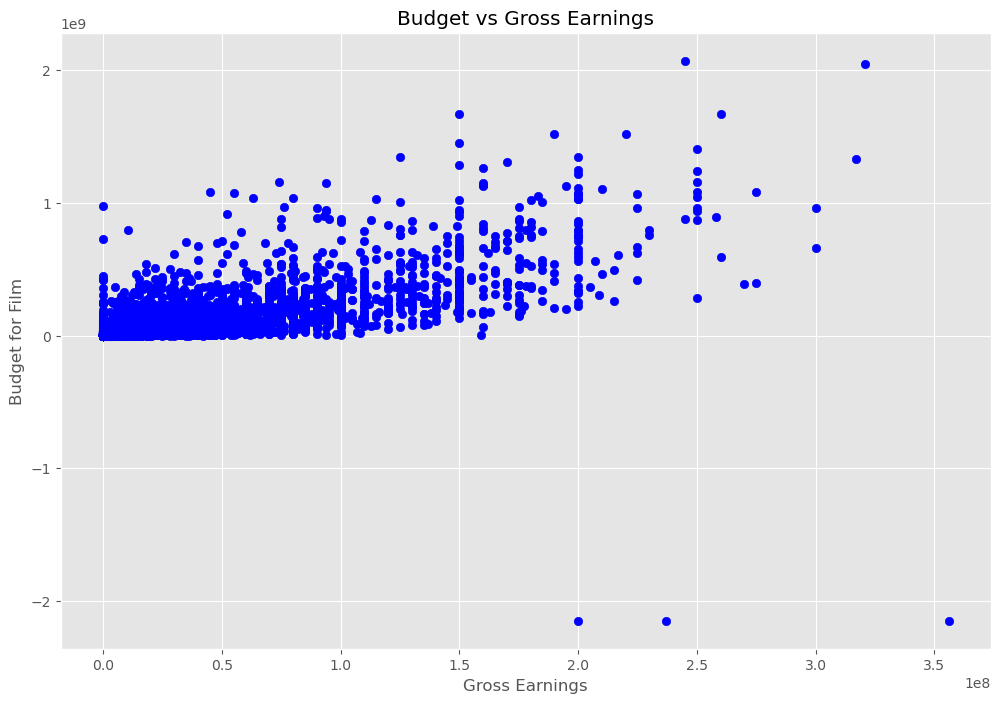

In [25]:
# Using a scatterplot to view Budget vs. Gross Earnings

plt.scatter(x=df['budget'], y=df['gross'], c='blue')

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

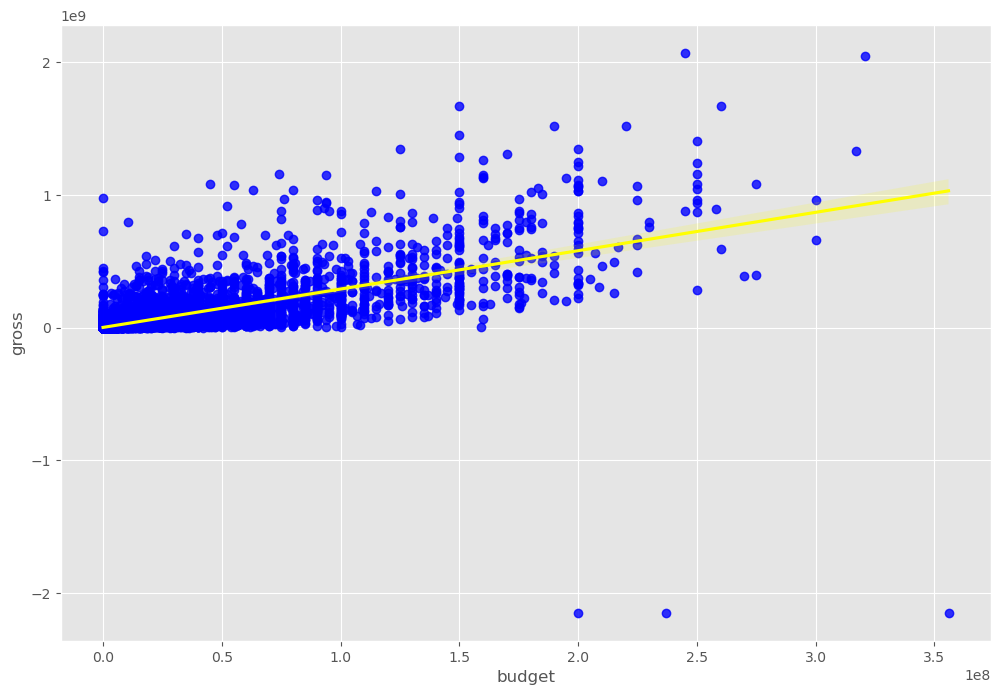

In [27]:
# We can add a regression line to get a better view of the relationship between budget and gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"blue"}, line_kws={"color":"yellow"})

             year     score     votes    budget     gross   runtime
year     1.000000  0.105994  0.217921  0.300066  0.249607  0.120636
score    0.105994  1.000000  0.409182  0.055665  0.169406  0.399451
votes    0.217921  0.409182  1.000000  0.486931  0.573930  0.309122
budget   0.300066  0.055665  0.486931  1.000000  0.687124  0.269510
gross    0.249607  0.169406  0.573930  0.687124  1.000000  0.204177
runtime  0.120636  0.399451  0.309122  0.269510  0.204177  1.000000


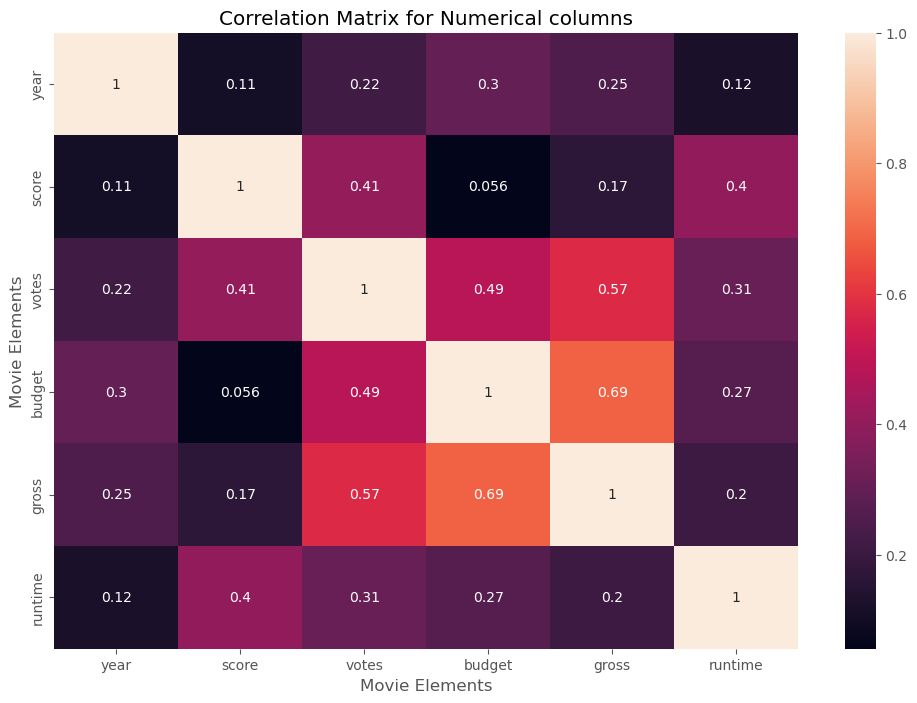

In [31]:
# Now let's take a look at all correlations for the numerical columns in our dataset (We will exclude object columns from our correlation)
df_numerical_cols = df.select_dtypes(include='number')

correlation_matrix = df_numerical_cols.corr(method='pearson')

print(correlation_matrix)

# We can visualize these in a heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numerical columns')

plt.xlabel('Movie Elements')

plt.ylabel('Movie Elements')

plt.show()

         year  score    votes    budget     gross  runtime
year      1.0    NaN      NaN       NaN       NaN      NaN
score     NaN    1.0      NaN       NaN       NaN      NaN
votes     NaN    NaN  1.00000       NaN  0.573930      NaN
budget    NaN    NaN      NaN  1.000000  0.687124      NaN
gross     NaN    NaN  0.57393  0.687124  1.000000      NaN
runtime   NaN    NaN      NaN       NaN       NaN      1.0


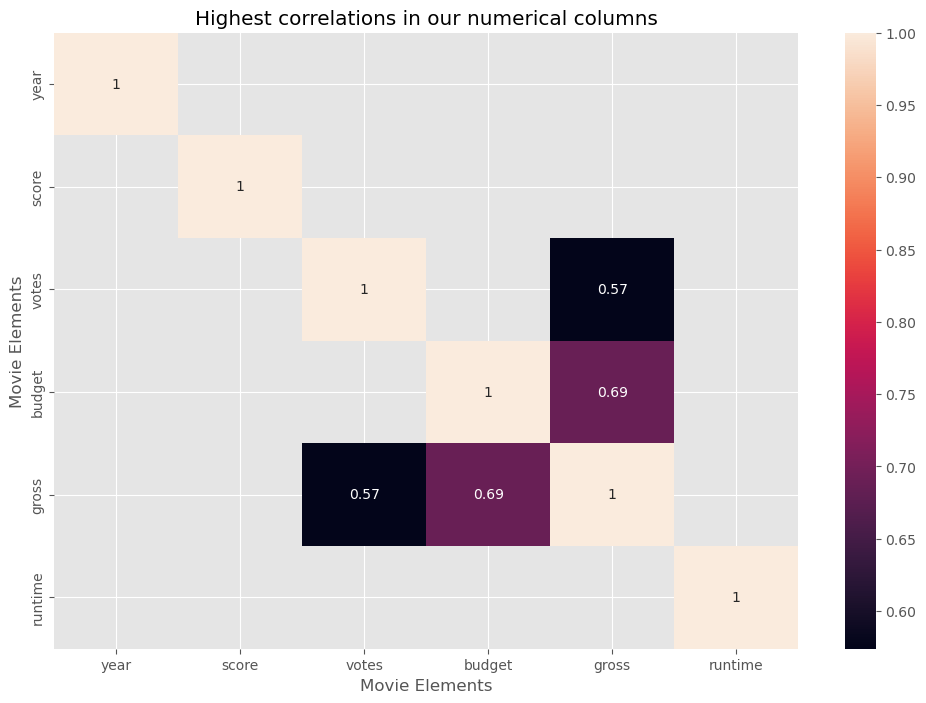

In [35]:
# We can filter our results to only show correlations higher than 0.5 (Once again excluding the object columns)

numerical_pairs = df.select_dtypes(include='number')

correlation_matrix = numerical_pairs.corr(method='pearson')

high_correlation = correlation_matrix[correlation_matrix > 0.5]

print(high_correlation)

sns.heatmap(high_correlation,annot=True)

plt.title('Highest correlations in our numerical columns')

plt.xlabel('Movie Elements')

plt.ylabel('Movie Elements')

plt.show()

In [29]:
# Which companies brought in the most gross revenue in our dataset?

gross_grouped = df.groupby('company')['gross'].sum().reset_index().sort_values(by='gross', ascending=False)
top_20_highest = gross_grouped.head(20)
print(top_20_highest)

                            company        gross
2319                   Warner Bros.  56491421806
2281             Universal Pictures  52514188890
731               Columbia Pictures  43008941346
1812             Paramount Pictures  40493607415
2316           Walt Disney Pictures  36327887792
2253          Twentieth Century Fox  30913193094
1713                New Line Cinema  19883797684
887            DreamWorks Animation  11873612858
2232            Touchstone Pictures  11795832638
889             Dreamworks Pictures  11635441081
1606                 Marvel Studios  10120607435
1637      Metro-Goldwyn-Mayer (MGM)   9230230105
2147           Summit Entertainment   8373718838
1856        Pixar Animation Studios   7886344526
1109              Fox 2000 Pictures   7443502667
1540                      Lucasfilm   7185352192
2315  Walt Disney Animation Studios   6751509051
1521                      Lionsgate   6078452519
2242               TriStar Pictures   5667436463
2038                

In [51]:
# What company had the highest average movie scores? (Minimum 3 movies made)
count_five_movs = df.groupby('company')['score'].count().reset_index()
count_five_movs.rename(columns={'score':'movie_count'}, inplace=True)
filtered_companies = count_five_movs[count_five_movs['movie_count'] >= 3]

avg_rating_per_movie = df[df['company'].isin(filtered_companies['company'])].groupby('company')['score'].mean().reset_index()
avg_rating_per_movie.rename(columns={'score':'average_rating'}, inplace=True)
avg_rating_per_movie['average_rating'] = avg_rating_per_movie['average_rating'].round(2)
avg_rating_sorted = avg_rating_per_movie.sort_values(by='average_rating', ascending=False)
top_20_highest = avg_rating_sorted.head(20)
print(top_20_highest)

                               company  average_rating
12              Aamir Khan Productions            8.02
151                Excel Entertainment            8.00
149                     Eros Worldwide            7.97
314         Road Movies Filmproduktion            7.80
335                      Studio Ghibli            7.70
245                           Madhouse            7.68
255                     Marvel Studios            7.60
293            Pixar Animation Studios            7.59
105                       Circle Films            7.57
222                Jet Tone Production            7.53
81                       Canal+ España            7.52
301                   Quad Productions            7.50
388                        Yellow Bird            7.50
302                   R.P. Productions            7.50
241                          Lucasfilm            7.43
232               Les Films du Losange            7.42
6                                  A24            7.39
380  Warne